# Face Recognition with Eigenfaces

Resources:

1. MIT OpenCourseWare Lecture Notes titled "Face Recognition Using Eigenfaces: <br />
https://ocw.mit.edu/courses/6-881-representation-and-modeling-for-image-analysis-spring-2005/resources/l02/



## Objective
* To recognize familiar faces in our dataset

## Basic Idea
Apply Principal Component Analysis (PCA) on face images.

PCA works by keeping the most important information from a feature and then ignore the rest (noise). In terms of Face Recognition, PCA looks for directions where face images vary the most as these are the principal components of the faces.

Conceptually, applying dimensional reduction technique on images, allows images of the same object to have high similarity in values relative to images of another object that looks completely different.

When we receive images such as face images and reduce its dimension, we can then take another image that we want to recognize, project it onto the face space and check for the residuals. If the residual is too high, it indicates a very low similarity, indicating that the image might not be even a face image. If the projection is close to one of the face image classes, we can safely assign it to that class. and if it's not, that it's probably a new face that doesn't exist in the dataset.

## Step-by-step in theory
1. Stack face images as vectors
2. Center the data
    * Compute average face
    * Subtract from every face
3. Find directions of maximum variance (to capture features of the face) which is done mathematically by:
    * Compute covariance matrix
    * Find eigen vectors (related to eigenvalues)
4. Keep only the most related components (dimensional reduction part)
5. Eigenfaces reconstruction

## Code Implementation

### Download and Save Dataset

In [ ]:
import kagglehub

# Download latest version of vggface2
path = kagglehub.dataset_download("hearfool/vggface2")

print("Path to dataset files:", path)

/Users/reiner/Documents/GitHub/face_recognition_eigenfaces/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 2.32G/2.32G [01:49<00:00, 22.7MB/s]


Extracting files...
Path to dataset files: /Users/reiner/.cache/kagglehub/datasets/hearfool/vggface2/versions/1


In [5]:
import os
import shutil

target_dir = "../dataset"

# Make directory, leave unaltered if already exist
os.makedirs(target_dir, exist_ok=True)

In [4]:
shutil.move(path, target_dir)

'../dataset/1'

### Sample_dataset decription:
* Class 1: n000430
    * Face Type: Asian
    * Gender: Female
    * Train path: '../sample_dataset/train/n000430'
    * Test path: '../sample_dataset/test/n000430'
    
* Class 2: n000458
    * Face Type: Western
    * Gender: Female
    * Train path: '../sample_dataset/train/n000458'
    * Test path: '../sample_dataset/test/n000430'

* Class 3: n000459
    * Face Type: Indian
    * Gender: Male
    * Train path: '../sample_dataset/train/n000459'
    * Test path: '../sample_dataset/test/n000430'

* Class 4: n000466
    * Face Type: Western
    * Gender: Male
    * Train path: '../sample_dataset/train/n000466'
    * Test path: '../sample_dataset/test/n000430'

### Preprocess Images

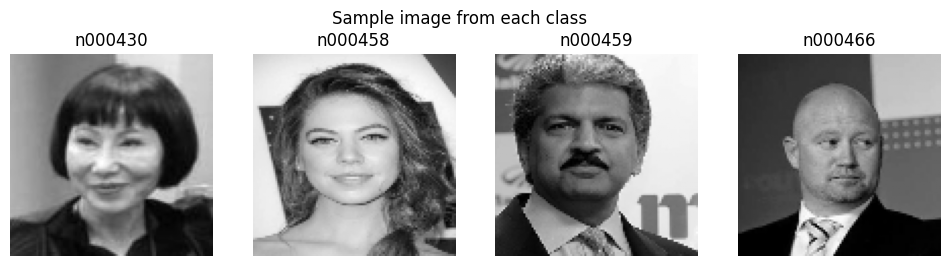

<class 'list'>


In [67]:
import matplotlib.pyplot as plt
import numpy as np

import cv2
import os
from pathlib import Path

data_dir = Path('../dataset/sample_dataset/train')

class_folder_list = []
image_path_list = []
image_list = []
label_list = []

NUM_OF_CLASSES = 4

plt.figure(figsize=(NUM_OF_CLASSES * 3, 3))

# Get all folder in the dataset
for class_folder in sorted(os.listdir(data_dir)):
    
    # Skip other file
    if class_folder == ".DS_Store":
        continue
    
    # Save folder name in class_folder_list
    class_folder_list.append(class_folder)

    for index, image_file in enumerate(sorted(os.listdir(data_dir / class_folder))):
        # print(image_file)
        
        # Save the list
        image_path_list.append(image_file)
        label_list.append(class_folder)
        
        # Read as grayscale
        image = cv2.imread(data_dir / class_folder / image_file, cv2.IMREAD_GRAYSCALE)
        
        # Image resize to 100x100
        image = cv2.resize(image, (100, 100))
        
        # Show the first train image from each label
        if index == 0:
            # print(f'PATH WITH INDEX 0 = {data_dir / class_folder / image_file}')
            
            # Show images as subplots
            plt.subplot(1, NUM_OF_CLASSES, len(class_folder_list))
            plt.imshow(image, cmap="gray")
            plt.title(class_folder)
            plt.suptitle('Sample image from each class')
            plt.axis('off')
            
            # DEBUG PRINT
            # print(image.shape)
            # print(image.flatten().shape)
            # print(image.flatten())
            
        image_list.append(image.flatten())
        
plt.show()

image_list = np.array(image_list)

# DEBUG PRINT
# print(type(image_list))
# print(image_list.ndim)
# print(image_list.shape)

# print(type(image_list[0]))
        
# print(class_folder_list)
# print(image_path_list)
print(type(label_list))
# print(len(image_path_list))
# print(len(label_list))

        

# Image resize for consistency (no need to be square, but needs to be the same for all images)


# Convert image to grayscale


# (Optional) manually adjust face alignment

# (Optional) consistent lighting across the images

In [ ]:
# Convert images to vector

# Flatten into long tensor

### Calculate Mean Faces

In [ ]:
# Take all face vectors

# Compute the average of each pixel